In [16]:
import networkx as nx
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import scipy.stats as stats
from scipy.special import factorial
import powerlaw
import numpy as np

In [4]:
# Load the datasets from the assignment_1_data folder
path = "Assignment_02_data/"
files = [f for f in listdir(path) if isfile(join(path, f))]
gmls = [nx.read_gml(path + f) for f in files]

graphs = {k: v for k, v in zip(files, gmls)}

In [15]:
# Compute the exponent γ of the power-law distribution fit p(k) ∼ k^−γ of the network degree distribution and the corresponding error.

degrees = {k: [v.degree(n) for n in v.nodes()] for k, v in graphs.items()}

powerlaws = {k: powerlaw.Fit(v, discrete=True) for k, v in degrees.items()}

for k, v in powerlaws.items():
    print(f"dataset: {k}, gamma: {v.power_law.alpha}, error: {v.power_law.sigma}")

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
dataset: graph_eu_airlines.gml, gamma: 2.2154320875133093, error: 0.11141847678633121
dataset: graph_hep-th.gml, gamma: 3.2144378552552664, error: 0.059871542647544525
dataset: graph_internet.gml, gamma: 1.9157988569314632, error: 0.013180032052154154
dataset: graph_macaque.gml, gamma: 5.771172341306776, error: 0.6886594089008911
dataset: graph_starwars.gml, gamma: 3.889074886148556, error: 1.0214422216756982


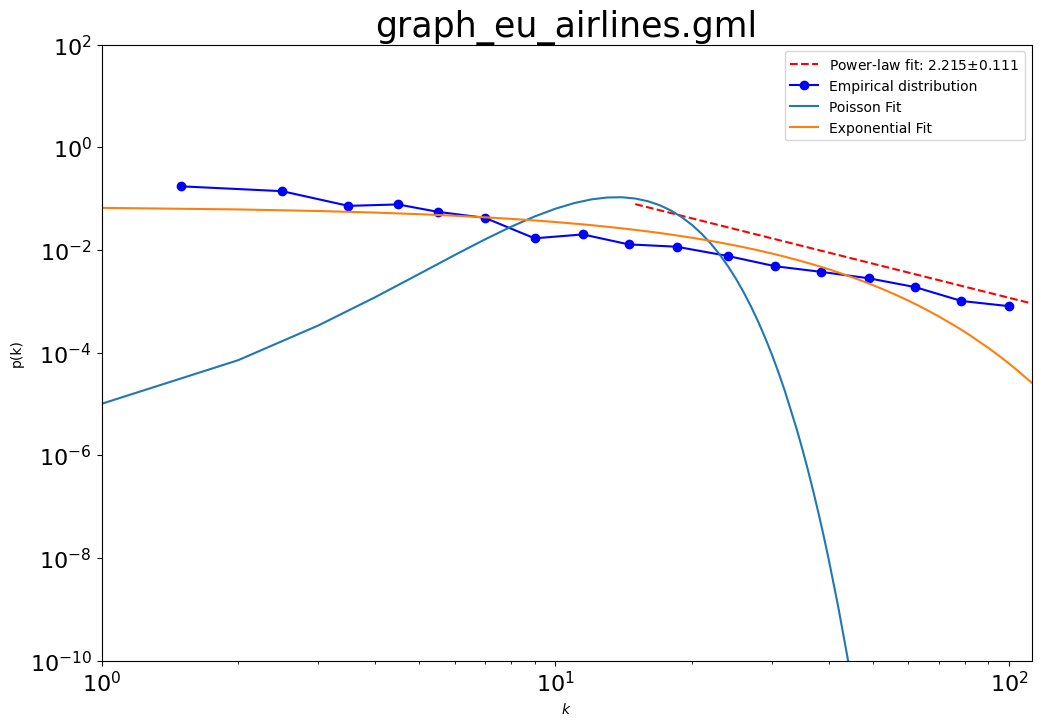

c:\Users\paull\miniconda3\envs\network_science\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in power
c:\Users\paull\miniconda3\envs\network_science\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


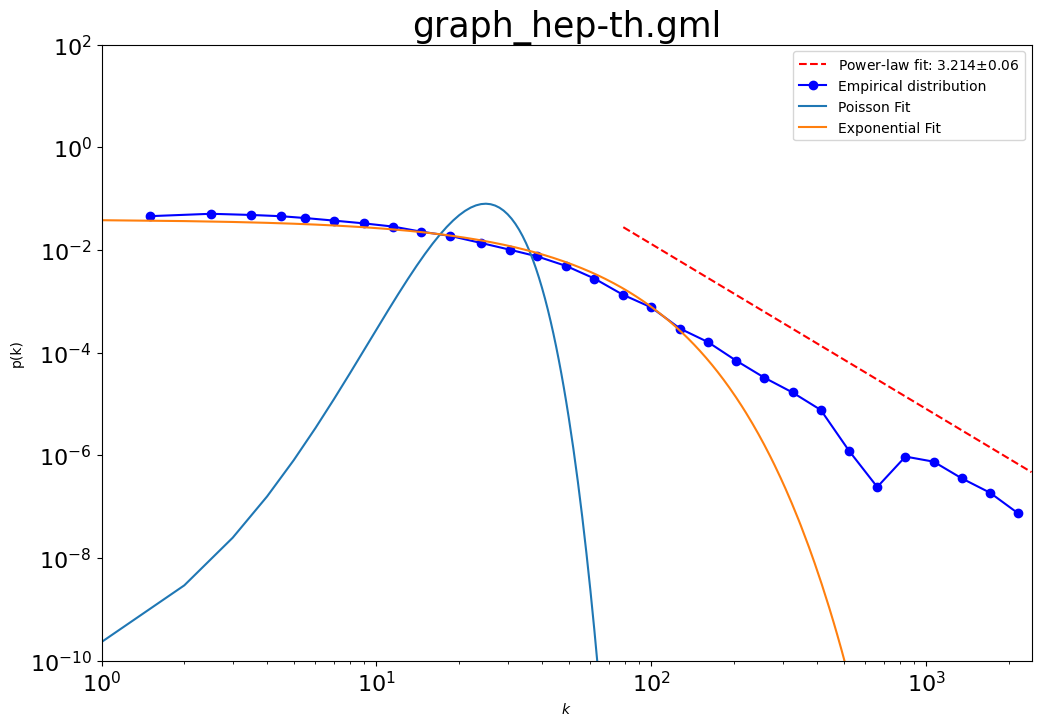

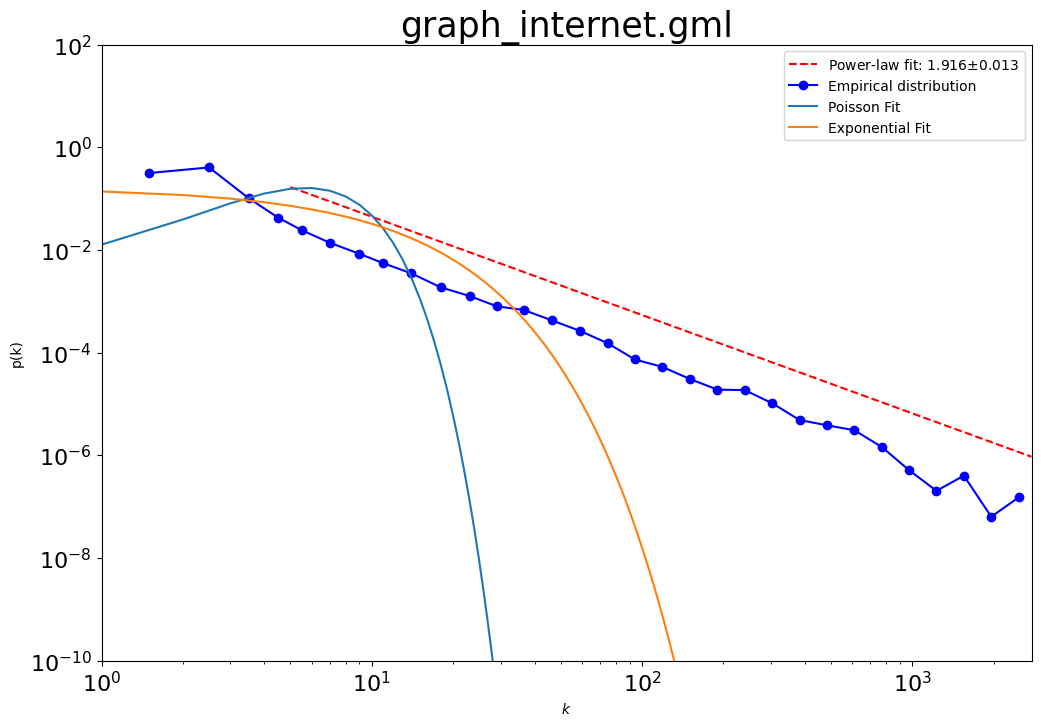

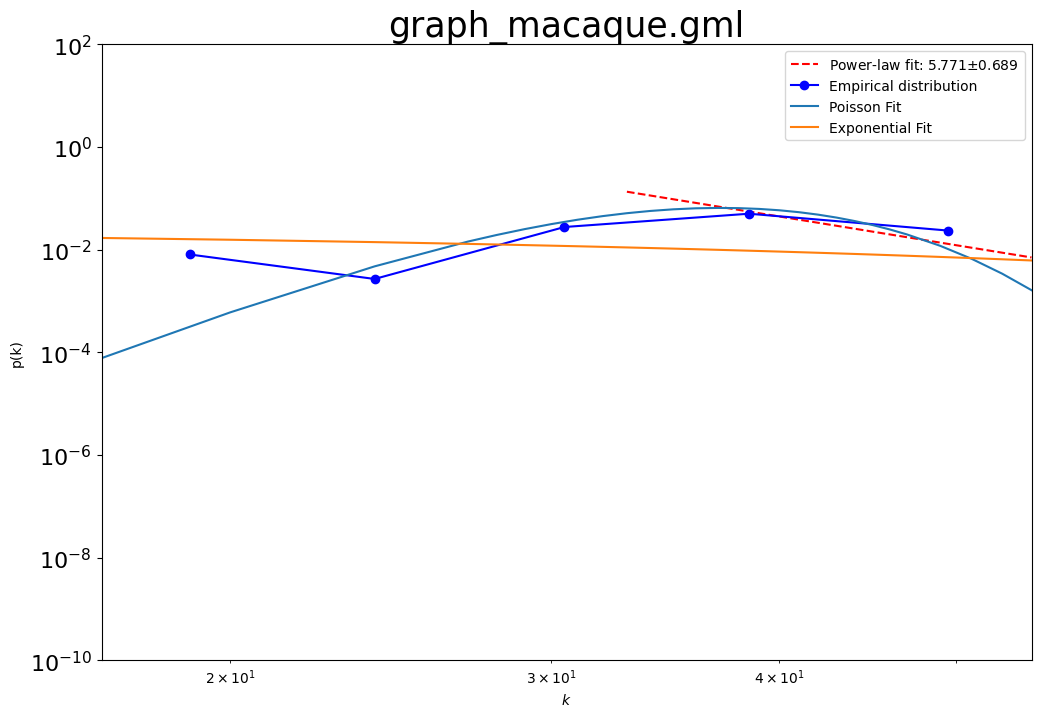

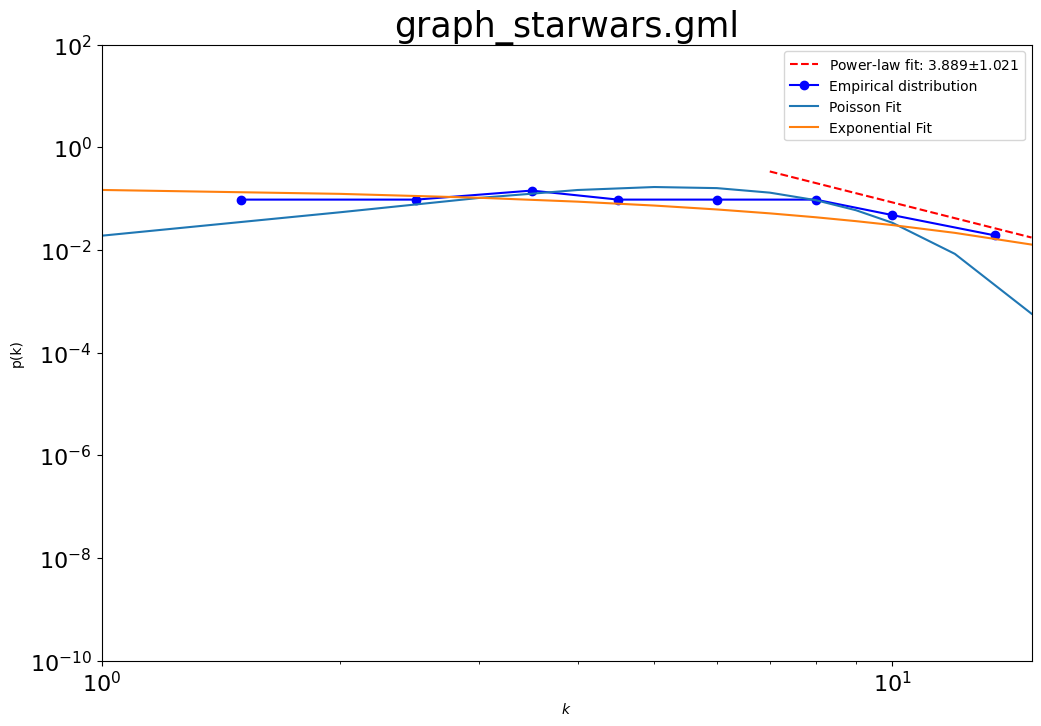

In [34]:
# Produce a single plot showing:
# • the empirical degree distribution,
# • the power-law fit,
# • the Poisson fit,
# • the exponential distribution with mean value equal to ⟨k⟩.

from collections import Counter 


for k, v in degrees.items():

    fit = powerlaws[k]

    lambda_ = np.mean(v)

    x_values = np.unique(v)

    # Empirical degree distribution
    #empirical_distribution = np.histogram(v, bins=x_values, density=True)[0]

    # Power-law fit
    power_law_fit = fit.power_law.pdf(x_values)

    # Poisson fit
    poisson_fit = (np.exp(-lambda_) * lambda_**x_values) / factorial(x_values)

    # Exponential fit
    exponential_fit = (1 / lambda_) * np.exp(-x_values / lambda_)

    # Plotting
    plt.figure(figsize=(12,8))
    plt.title(k, fontsize=25)
    plt.tick_params(axis='both', labelsize=16)
    fit.power_law.plot_pdf(color='red', linestyle='--', 
                           label="Power-law fit: " + str(round(fit.power_law.alpha, 3)) + '$\pm$' + str(round(fit.power_law.sigma, 3)))
    powerlaw.plot_pdf(v, color='blue', marker='o', label="Empirical distribution")
    
    plt.plot(x_values, poisson_fit, label='Poisson Fit')
    plt.plot(x_values, exponential_fit, label='Exponential Fit')

    plt.xscale('log')
    plt.xlim(xmin=min(v), xmax=max(v))
    plt.yscale('log')
    plt.ylim(ymin=1e-10, ymax=1e2)
    plt.xlabel('$k$')
    plt.ylabel('p(k)')
    plt.legend()
    plt.show()

**graph_eu_airlines.gml**

Follows closesly the power-law fit, seems to be scale-free therefore. Which would make sense, since this is a property of a robust network with hubs and we want the european airlines network to be robust. 

**graph_hep-th.gml**

Follows clearly the exponential fit, therefore not scale-free. Also makes sense, since there are probably relatively few publications with a lot of citations.

**graph_internet.gml**

Follows clearly the power-law fit, therefore scale-free which is desired to make the internet robust.

**graph_macaque.gml**

Seems to be following the Poisson fit, therefore not scale-free. To finally conclude, we'd need more data.

**graph_starwars.gml**

Seems to be following the exponential fit, therefore not scale-free. To finally conclude, we'd need more data.